List of things to do:
First big goal is to get new arrays containing each object in question.
or, we could get the coords of each object, and get them all from the big guy.

We want surface brightness plots.

surface brightness in counts/pix
plot scatter of each pixel's distance from the centroid

for finding, load the coords we got from PASSAGE and fit a gaussian to it

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import astropy.coordinates as coord
from astropy.io import fits
from astropy.utils.data import download_file
from astropy.wcs import WCS
import astropy.units as u
from astropy import wcs

Parameters to change before a run:

In [29]:
#definitely change
current_par="Par003"
current_obj=280

#maybe tweak if something breaks
centroid_radius=50 #in pixels
galaxy_radius=60

Load in the image (only redo when changing par), then load the coord object

In [30]:
pic_hdulst=fits.open('./big_pix/'+current_par+'_comb_drz_sci.fits')
pic_header=pic_hdulst[0].header
w=wcs.WCS(pic_header)
im_scale_as=np.abs(pic_header['CD1_1'])*206265*np.pi/180

data=pic_hdulst[0].data
#get the pixel data
#get the world to coords
#we need a skycoord obj
#first load all the coords for the par
hdulst=fits.open('./spec_fits/'+current_par+'_speccat.fits')
tabhdu=hdulst[1]
jw_table=tabhdu.data


In [31]:
#THIS SHOULD BE DONE EVERY NEW OBJECT

jw_table_obj=jw_table[jw_table['id']==current_obj] #pick the row in the info table that has the id of current obj selected
jw_coords=coord.SkyCoord(ra=jw_table_obj['ra'],dec=jw_table_obj['dec'],unit=(u.deg, u.deg))
x_mid,y_mid=w.world_to_pixel(jw_coords)

Next order of business: find the centroid of this object.

This should be simple, unless we have saturation issues.

first, create a coordinate meshgrid for the entire par

In [32]:
#ONLY DO THIS WHEN CHANGING PARS
y_shape,x_shape=data.shape
x_temp=np.linspace(0,x_shape-1,x_shape)
y_temp=np.linspace(0,y_shape-1,y_shape) #for meshgrid

x_grid,y_grid=np.meshgrid(x_temp,y_temp)
data.shape


(6521, 6513)

Now we create a condition to isolate the particles directly inside the the radius

NEED to make a version for saturated pixels, where you just take the centroid of all the saturated pixels!

In [33]:
criteria=np.sqrt((x_mid-x_grid)**2+(y_mid-y_grid)**2) < centroid_radius

x_cen = np.sum(x_grid[criteria]*data[criteria])/np.sum(data[criteria])
y_cen = np.sum(y_grid[criteria]*data[criteria])/np.sum(data[criteria])

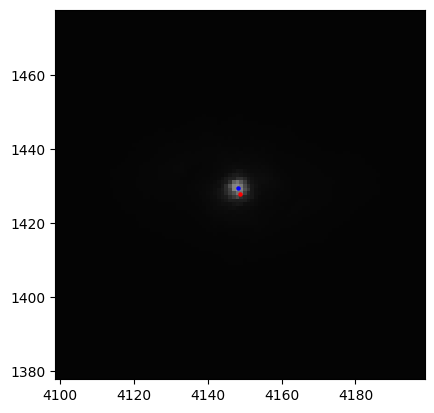

In [34]:
#plot center of galaxy from jw and centroid
plt.figure()
plt.imshow(data,cmap='gray')
plt.xlim(x_mid-centroid_radius,x_mid+centroid_radius)
plt.ylim(y_mid-centroid_radius,y_mid+centroid_radius)
plt.scatter(x_mid,y_mid,s=5,color='red')
plt.scatter(x_cen,y_cen,s=5,color='blue')
plt.show()

#CENTROID IS BETTER?

(0.0001, 6.032788440648896)

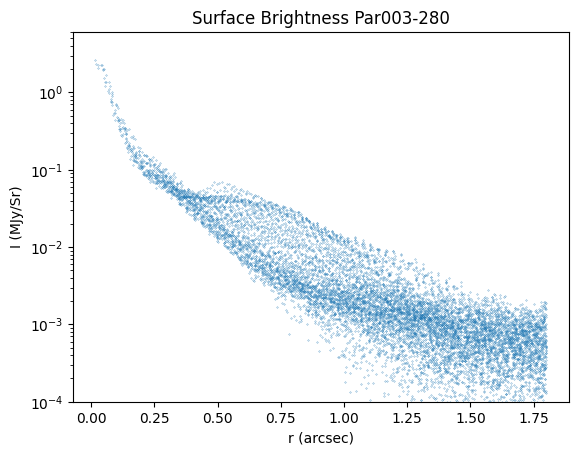

In [36]:
criteria_cen=np.sqrt((x_cen-x_grid)**2+(y_cen-y_grid)**2) < galaxy_radius
dist_temp=np.sqrt((x_grid[criteria_cen]-x_cen)**2+(y_grid[criteria_cen]-y_cen)**2)
fig=plt.figure()
ax=fig.add_axes(111)
ax.set_yscale('log')
ax.scatter(dist_temp*im_scale_as,data[criteria_cen],s=0.05)
ax.set_title('Surface Brightness '+current_par+'-'+str(current_obj))
ax.set_ylabel('I (MJy/Sr)')
ax.set_xlabel('r (arcsec)')
ax.set_ylim(1e-4)

